In [64]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
%matplotlib inline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc

In [65]:
cancer = datasets.load_breast_cancer()

In [66]:
X = cancer.data
y = cancer.target

In [67]:
def train_test_model(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    cm = confusion_matrix(y_test, y_predict, labels = model.classes_)
    auc_score = roc_auc_score(y_test, y_predict)
    cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    fpr, tpr, thresholds = roc_curve(y_test, y_predict)
    roc_auc = auc(fpr, tpr)
    rcd = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc = roc_auc, estimator_name='example estimator')
    return (cm, auc_score, cmd, rcd)

In [68]:
model_rfr = RandomForestClassifier(max_depth=2, random_state = 42)

In [69]:
res = train_test_model(model_rfr, X, y)

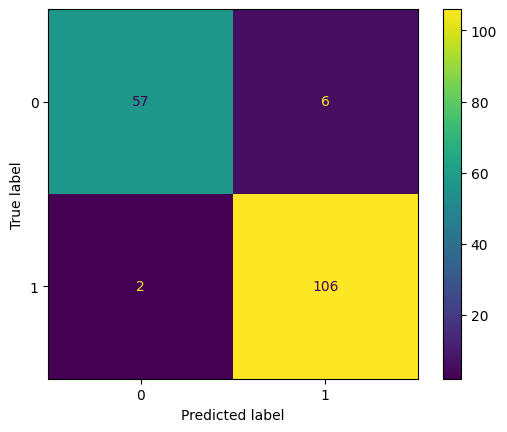

In [70]:
res[2].plot()

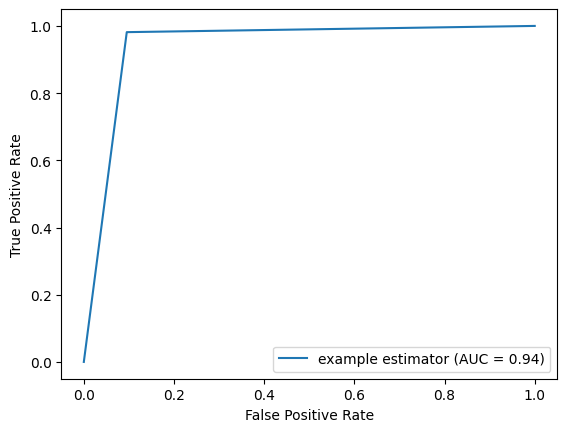

In [71]:
res[3].plot()

In [72]:
res[1]

0.943121693121693

In [73]:
def train_test_model_with_GSCV(model, X, y, param_grid):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
    model_gscv = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5)
    model_gscv.fit(X_train, y_train)
    best_model = model_gscv.best_estimator_
    y_predict = best_model.predict(X_test)
    cm = confusion_matrix(y_test, y_predict, labels = best_model.classes_)
    auc_score = roc_auc_score(y_test, y_predict)
    cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = best_model.classes_)
    fpr, tpr, thresholds = roc_curve(y_test, y_predict)
    roc_auc = auc(fpr, tpr)
    rcd = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc = roc_auc, estimator_name='example estimator')
    return (cm, auc_score, cmd, rcd)

In [74]:
param_grid={'max_depth': [2, 3, 5, 7], 'n_estimators': [10, 50, 100, 500]}
res = train_test_model_with_GSCV(RandomForestClassifier(), X, y, param_grid)

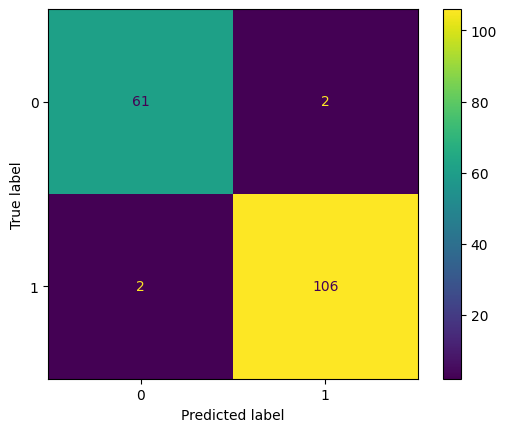

In [76]:
res[2].plot()

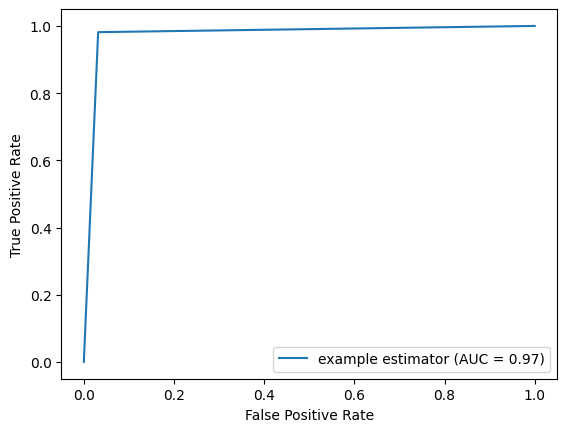

In [77]:
res[3].plot()

In [78]:
res[1]

0.9748677248677248

In [87]:
param_grid={'n_neighbors': [2, 3, 5, 7, 11, 13, 17]}
res = train_test_model_with_GSCV(KNeighborsClassifier(), X, y, param_grid)

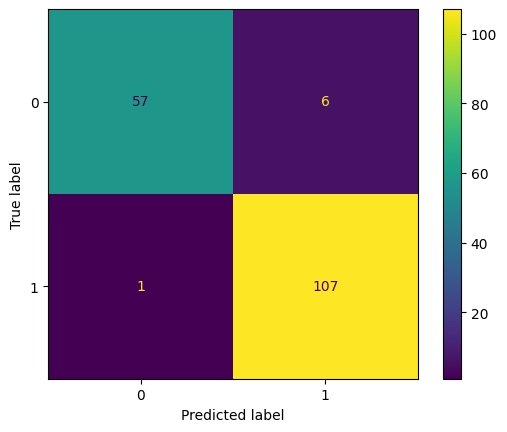

In [88]:
res[2].plot()

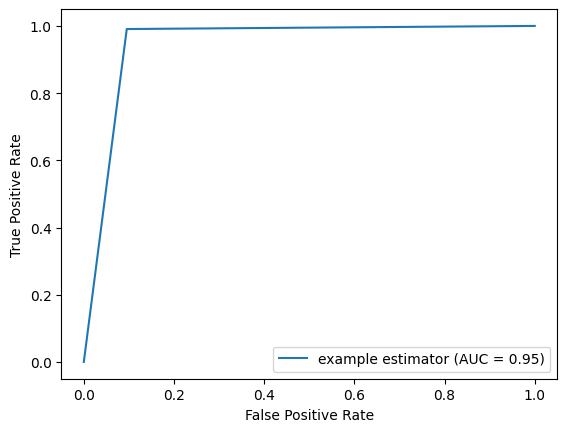

In [89]:
res[3].plot()

In [90]:
res[1]

0.9477513227513227